In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data)

sklearn.utils._bunch.Bunch

In [ ]:
  
# # IMPORT THE IRIS DATA FROM THE 
# # SKLEARN MODULE
# from sklearn.datasets import load_iris
  
# # LOAD THE IRIS DATASET BY CALLING
# # THE FUNCTION
# iris_data = load_iris()
 
  
# # PLACE THE IRIS DATA IN A PANDAS
# # DATAFRAME
# attr = pd.DataFrame(data=iris_data.data, 
#                   columns=iris_data.feature_names)
# target =pd.DataFrame({'Species': iris_data.target})

# # DISPLAY FIRST 5 RECORDS OF THE 
# # DATAFRAME
# target.head()
# attr.head(10)

In [ ]:
# # Loading iris
# df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris.csv')
# # df.head()
# print(df.describe())
# # #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type
# df.head(10)
# df.dtypes

Data dictionary
Species        category
SepalLength       Int64ML03_knn_iris
SepalWidth        Int64
PetalLength       Int64
PetalWidth        Int64

In [3]:
data_types = {
    'Species':     'category',
    'SepalLength': 'Int64',
    'SepalWidth':  'Int64',
    'PetalLength': 'Int64',
    'PetalWidth':  'Int64'
}

file_path='data/iris.csv'

# # Read CSV file with appropriate handling of missing values
df = pd.read_csv(file_path, na_values='?',dtype=data_types)

## Loading iris
# df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris.csv',)

print(df.describe())
# #data preprocessing
## df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type if needed
df.head(10)

       SepalLength  SepalWidth  PetalLength  PetalWidth
count        150.0       150.0        150.0       150.0
mean     58.433333   30.573333        37.58   11.993333
std       8.280661    4.358663    17.652982    7.622377
min           43.0        20.0         10.0         1.0
25%           51.0        28.0         16.0         3.0
50%           58.0        30.0         43.5        13.0
75%           64.0        33.0         51.0        18.0
max           79.0        44.0         69.0        25.0


,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2
5,Setosa,48,31,16,2
6,Setosa,52,34,14,2
7,Setosa,49,36,14,1
8,Setosa,44,32,13,2
9,Setosa,50,35,16,6


In [4]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
attr = df.drop(columns = ['Species'])  # features
target = df['Species']  # target variable
attr.head()
# target.head()

Empty DataFrame
Columns: [Species, SepalLength, SepalWidth, PetalLength, PetalWidth]
Index: []


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,50,33,14,2
1,46,34,14,3
2,46,36,10,2
3,51,33,17,5
4,55,35,13,2


In [5]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.194444,0.541667,0.067797,0.041667
1,0.083333,0.583333,0.067797,0.083333
2,0.083333,0.666667,0.000000,0.041667
3,0.222222,0.541667,0.118644,0.166667
4,0.333333,0.625000,0.050847,0.041667


In [ ]:
import random
random_state=55
random.seed(random_state)  # Set the seed
# random.seed()
print(random.randint(1, 100))  # Generates a random number

12


In [7]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state =random_state , shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()


9         Setosa
36        Setosa
8         Setosa
137    Virginica
136    Virginica
Name: Species, dtype: category
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

In [8]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [1,3, 5, 10]

# for i in range(1,20):
#     print(i)
 
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
#     knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')

Accuracy of model with k = 1: 0.9736842105263158

Accuracy of model with k = 3: 0.9736842105263158

Accuracy of model with k = 5: 0.9736842105263158

Accuracy of model with k = 10: 0.9736842105263158



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))


Confusion Matrix
[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]

Accuracy score
0.9736842105263158

Classification Report
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [10]:
test_actual=attr_test
test_actual['target_pred']=target_pred
test_actual['test_actual']=target_test
test_actual.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,target_pred,test_actual
9,0.194444,0.625000,0.101695,0.208333,Setosa,Setosa
36,0.194444,0.625000,0.050847,0.083333,Setosa,Setosa
8,0.027778,0.500000,0.050847,0.041667,Setosa,Setosa
137,0.861111,0.333333,0.864407,0.750000,Virginica,Virginica
136,0.722222,0.500000,0.796610,0.916667,Virginica,Virginica


In [11]:
freq_table =pd.crosstab( test_actual['test_actual'], test_actual['target_pred'])
print("Confusion Matrix")
print(freq_table)

Confusion Matrix
target_pred  Setosa  Versicolor  Virginica
test_actual                               
Setosa           13           0          0
Versicolor        0          12          0
Virginica         0           1         12


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginica')]

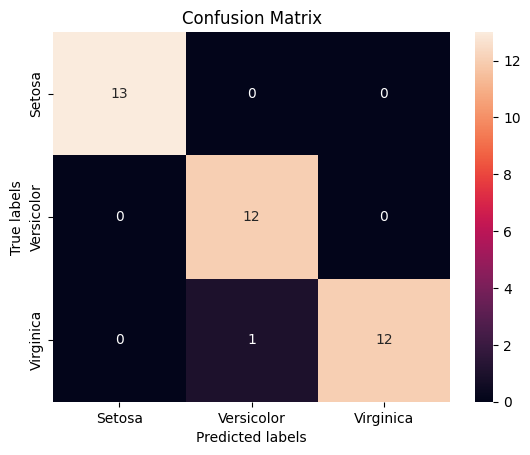

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica'])